In [28]:
import pandas as pd
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
import torch

from config.model_config import ModelConfig
from config.experiment_config import ExperimentConfig, AvailableDatasets
from vol_predict.features.preprocessor import OneToOnePreprocessor
from vol_predict.loss.loss import Loss

from vol_predict.models.dl.mlp_predictor import MLPPredictor as Model
from vol_predict.models.baselines.naive_predictor import (
    NaivePredictor as Baseline,
)

from run import run_backtest, initialize_sequential_runner

In [30]:
config = ExperimentConfig()
config.DATASET = AvailableDatasets.BITCOIN

model_params = ModelConfig()
baseline_params = ModelConfig()

model_params.n_features = 1200
model_params.n_unique_features = 10

# Handles the features
feature_processor = OneToOnePreprocessor()

runner = initialize_sequential_runner(
    model_config=model_params,
    preprocessor=feature_processor,
    experiment_config=config,
)

Available data from 2018-06-04 23:00:00 to 2018-09-30 21:00:00


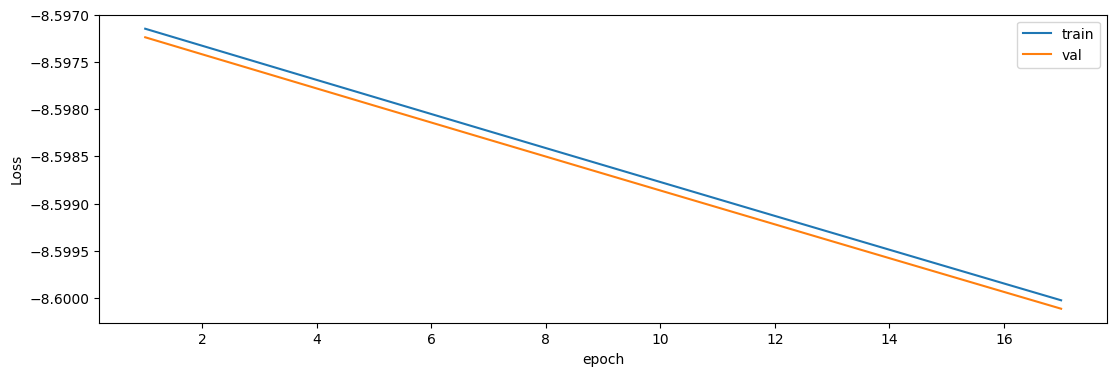

Training 18/20:  63%|██████▎   | 22/35 [00:04<00:02,  4.43it/s]


KeyboardInterrupt: 

In [31]:
runner.model_config.lr = 1e-2
runner.model_config.n_epochs = 20
runner.model_config.hidden_size = 64
runner.model_config.n_layers = 3
runner.model_config.batch_size = 16
runner.model_config.optimizer = torch.optim.Adam
runner.model_config.loss = Loss.NLL
runner.model_config.dropout = 0.20

result = run_backtest(
    model_cls=Model,
    baseline_cls=Baseline,
    runner=runner,
)

In [14]:
result

,model_loss,baseline_loss,true_returns,true_vols,model_preds,baseline_preds
datetime,,,,,,
2018-06-30,2.593453e+07,3.072955,"[-0.0026883667, -0.004259642, 0.0017928587, 0....","[0.00041156381, 0.0004322233, 0.00021497025, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[647.26526, 647.0407, 647.0289, 647.0739, 647...."
2018-07-05,1.575679e+07,3.343994,"[-0.0025450767, 0.0020725208, -0.0004954421, -...","[0.00021121168, 0.0001595019, 0.00016921855, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3668.7114, 3669.3997, 3669.1436, 3669.2869, 3..."
2018-07-10,1.889828e+07,2.428745,"[-0.0021792948, 0.0005109866, 0.00070048636, -...","[0.00016044531, 0.00012531331, 8.648752e-05, 7...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[88.8381, 88.83234, 88.81918, 88.81818, 88.836..."
2018-07-15,6.851937e+07,3.919694,"[0.00090926996, -0.00016162315, 0.0028238427, ...","[6.138905e-05, 4.4802924e-05, 8.2382474e-05, 5...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[6018.4263, 6018.4805, 6018.409, 6018.6074, 60..."
2018-07-20,2.955482e+07,6.524250,"[0.0016087972, -0.0024853398, -0.004938002, -0...","[4.2298943e-05, 4.114835e-05, 7.0722686e-05, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[201063.22, 201064.05, 201062.27, 201061.14, 2..."
2018-07-25,3.878376e+07,5.986445,"[-0.008449829, 0.0038263223, 0.004215324, 0.00...","[0.00024071828, 0.00015700524, 9.3138595e-05, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[14013.671, 14014.458, 14013.143, 14013.085, 1..."
2018-07-30,5.098943e+07,6.128023,"[-0.002002476, -0.0008079753, -0.001266979, 0....","[2.0188261e-05, 1.9543379e-05, 2.5798885e-05, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[128270.805, 128275.53, 128274.875, 128275.18,..."
2018-08-04,5.441476e+07,1.830396,"[-0.0003308475, -0.0018424237, 0.0016508304, -...","[0.000100981226, 4.602776e-05, 4.093159e-05, 2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[48530.48, 48530.305, 48530.15, 48530.473, 485..."
2018-08-09,7.903692e+07,5.290096,"[-0.0027170812, 0.0020420607, 0.0029039332, 0....","[3.1182026e-05, 4.331007e-05, 4.167312e-05, 8....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[46953.58, 46952.65, 46953.1, 46953.19, 46953...."


In [15]:
import pandas as pd
from sklearn.metrics import root_mean_squared_error

rmse = []
for (date, row) in result.iterrows():
    rmse.append([date, root_mean_squared_error(row.true_vols, row.model_preds), root_mean_squared_error(row.true_vols, row.baseline_preds)])

rmse = pd.DataFrame(rmse, columns=["date", "model", "baseline"]).set_index("date")

In [16]:
rmse.mean(axis=0)

model            0.000223
baseline    411974.522458
dtype: float64

In [17]:
rmse.std(axis=0)

model            0.000154
baseline    802546.924218
dtype: float64

In [18]:
# result.to_csv("MLP_results.csv")

In [19]:
result.to_csv(f"Daily_MLP_results_{runner.model_config.n_epochs}.csv")